In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Uniform Distribution

Text(0, 0.5, 'Density')

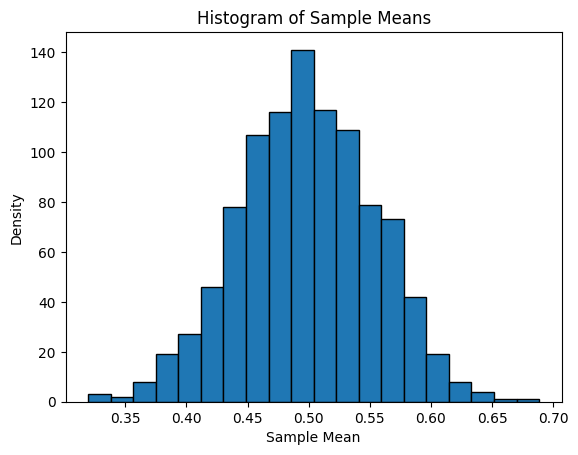

In [16]:
# set parameters
num_samples = 1000
size_smaples = 30
distribution = (0,1)

samples = np.random.uniform(distribution[0], distribution[1],(num_samples,size_smaples))
sample_means = np.mean(samples ,axis = 1)

plt.hist(sample_means,bins = 20,edgecolor = "black")
plt.title("Histogram of Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Density")

## Log - Normal Distribution

In [19]:
# set parameters
num_samples = 1000
sample_size = 30

# Log-Normal distribution parameters
mu = 0.5
sigma = 0.7

# Calculate the theoretical mean and variance
theoretical_mean = np.exp(mu + (sigma ** 2) / 2)
theoretical_variance = (np.exp(sigma ** 2) - 1) * np.exp(2 * mu + sigma ** 2)

# Generate samples from the Log-Normal distribution
samples = np.random.lognormal(mean=mu, sigma=sigma, size=(num_samples, sample_size))


# Calculate the sample means
sample_means = np.mean(samples, axis=1)

# Calculate the empirical mean and variance of the sample means
empirical_mean = np.mean(sample_means)
empirical_variance = np.var(sample_means)
# Compare the theoretical and empirical values
print(f"Theoretical mean: {theoretical_mean:.4f}")
print(f"Empirical mean: {empirical_mean:.4f}")
print(f"\n")
print(f"Theoretical variance: {theoretical_variance:.4f}")
print(f"Empirical variance: {empirical_variance:.4f}")


Theoretical mean: 2.1064
Empirical mean: 2.1069


Theoretical variance: 2.8056
Empirical variance: 0.0838


### CLT - Case Study 1

In [1]:
import numpy as np

# Set the parameters
population_size = 100000
sample_size = 50
num_samples = 100

# Generate a random representative sample of salaries (in thousands)
# You should replace this with actual collected salary data
np.random.seed(42)  # Setting a seed for reproducibility
population_salaries = np.random.lognormal(mean=4.5, sigma=0.8, size=population_size)

# Generate multiple samples and calculate the sample means and standard deviations
sample_means = []
sample_std_devs = []

for _ in range(num_samples):
  sample_salaries = np.random.choice(population_salaries, size=sample_size)
  sample_means.append(np.mean(sample_salaries))
  sample_std_devs.append(np.std(sample_salaries))

# Calculate the average of the sample means and the standard error
average_sample_means = np.mean(sample_means)
standard_error = np.std(sample_means) / np.sqrt(num_samples)

# Calculate the 95% confidence interval
margin_of_error = 1.96 * standard_error
lower_limit = average_sample_means - margin_of_error
upper_limit = average_sample_means + margin_of_error

# Report the results
print(f"Estimated average salary (in thousands): {average_sample_means:.2f}")
print(f"95% confidence interval (in thousands): ({lower_limit:.2f}, {upper_limit:.2f})")


Estimated average salary (in thousands): 124.74
95% confidence interval (in thousands): (121.23, 128.26)


## CLT Case Study 2 Titanic DataSet
 - For this we already have titanic dataset and assuming we don;t have entire population and need to calculate the Mean Fare of the population

In [4]:
# Importing DataSet
dataset = "https://drive.google.com/uc?export=download&id=1bS9yGe0HH4Kj0A6zMSqNOasqCxrMHrU9"
df = pd.read_csv(dataset)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: ylabel='Density'>

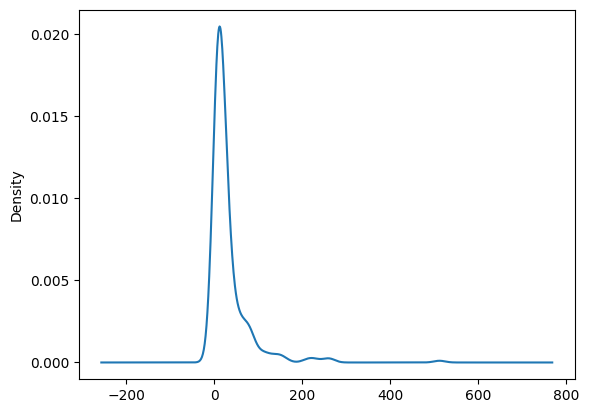

In [6]:
df['Fare'].plot(kind = "kde")

In [27]:
# From the chart above we can see the fare is right skewed
# Now generating 50 samples each of size 100 times
samples = []
for i in range(100):
    samples.append(df['Fare'].dropna().sample(50).tolist())
samples

[[39.6875,
  0.0,
  134.5,
  8.5167,
  29.0,
  93.5,
  10.5,
  13.0,
  7.225,
  26.0,
  57.9792,
  73.5,
  41.5792,
  7.225,
  55.0,
  7.8958,
  77.2875,
  57.0,
  31.275,
  21.0,
  19.5,
  39.6,
  7.775,
  0.0,
  27.9,
  27.7208,
  16.1,
  39.0,
  7.2292,
  26.0,
  13.0,
  26.0,
  8.05,
  31.275,
  8.3,
  26.55,
  80.0,
  7.2292,
  24.15,
  13.7917,
  7.8542,
  7.225,
  11.1333,
  7.75,
  8.05,
  26.0,
  7.0458,
  7.775,
  12.475,
  38.5],
 [8.05,
  8.6625,
  7.125,
  57.9792,
  7.225,
  35.5,
  52.0,
  10.4625,
  7.8958,
  151.55,
  7.8,
  7.25,
  7.25,
  0.0,
  34.375,
  10.5,
  19.9667,
  27.7208,
  13.5,
  8.05,
  7.65,
  13.0,
  0.0,
  9.825,
  15.2458,
  8.6625,
  27.9,
  211.5,
  52.0,
  13.0,
  7.225,
  7.8292,
  6.975,
  26.0,
  13.0,
  46.9,
  7.8958,
  7.225,
  9.5,
  7.8958,
  56.4958,
  83.475,
  16.7,
  31.0,
  7.2292,
  79.65,
  15.85,
  86.5,
  211.3375,
  7.8958],
 [8.05,
  8.6625,
  15.5,
  7.6292,
  7.75,
  17.4,
  28.5,
  93.5,
  262.375,
  20.575,
  8.05,
  26.25,

In [28]:
samples = np.array(samples)

In [29]:
sampling_mean = samples.mean(axis = 1)

<Axes: ylabel='Density'>

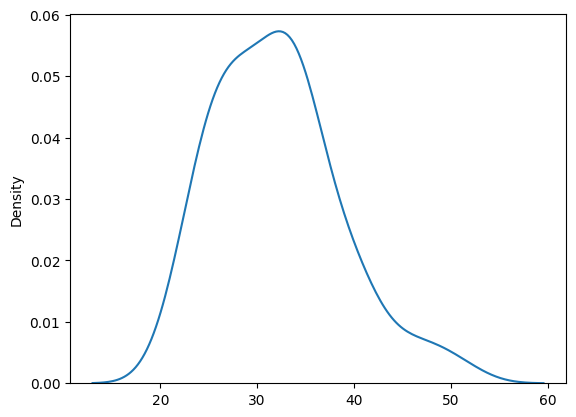

In [30]:
sns.kdeplot(sampling_mean)

In [31]:
sampling_mean.mean()

np.float64(32.00893746)

In [32]:
sampling_mean.std()/np.sqrt(50) # population STD

np.float64(0.9154659095469181)

In [33]:
lower_limit = sampling_mean.mean() - 2*sampling_mean.std()
upper_limit = sampling_mean.mean() + 2*sampling_mean.std()

In [34]:
print('The range is',lower_limit,'-',upper_limit)

The range is 19.062294408285272 - 44.95558051171473


In [35]:
df['Fare'].dropna().mean()

np.float64(32.204207968574636)